**Chapter 2 – End-to-end Machine Learning project**

In [13]:
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Enterprise Data Science and Machine Learning/zomato1.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv(path,encoding="latin-1")

In [16]:
df.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
0        3400025                             Jahanpanah             1  Agra   
1        3400341                    Rangrezz Restaurant             1  Agra   
2        3400005                Time2Eat - Mama Chicken             1  Agra   
3        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
4        3400017                         Pinch Of Spice             1  Agra   

                                             Address     Locality  \
0  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
1  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
2        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
3  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
4  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

    Locality Verbose  Longitude   Latitude                        Cuisines  \
0   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
1   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
2   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
3  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
4  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

   ...            Currency Has Table booking Has Online delivery  \
0  ...  Indian Rupees(Rs.)                No                  No   
1  ...  Indian Rupees(Rs.)                No                  No   
2  ...  Indian Rupees(Rs.)                No                  No   
3  ...  Indian Rupees(Rs.)                No                  No   
4  ...  Indian Rupees(Rs.)                No                  No   

  Is delivering now Switch to order menu Price range  Aggregate rating  \
0                No                   No           3               3.9   
1                No                   No           2               3.5   
2                No                   No           2               3.6   
3                No                   No           2               4.0   
4                No                   No           3               4.2   

   Rating color Rating text Votes  
0        Yellow        Good   140  
1        Yellow        Good    71  
2        Yellow        Good    94  
3         Green   Very Good    87  
4         Green   Very Good   177  

[5 rows x 21 columns]

This project requires Python 3.7 or above:

Dropping all the rows where the latitude and longitude = 0 as they would cause errors in visualisation and modelling

In [19]:
index_to_drop = df[(df["Longitude"] == 0) & (df["Latitude"] == 0)].index
df.drop(index_to_drop, inplace=True)

In [21]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [22]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

*Welcome to Machine Learning Restaurants Corp.! Your task is to predict Average Cost for two people dining in the restraunt in Indian Restraunts given the features from the dataset.*

## Take a Quick Look at the Data Structure

In [23]:
df.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
0        3400025                             Jahanpanah             1  Agra   
2        3400005                Time2Eat - Mama Chicken             1  Agra   
3        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
4        3400017                         Pinch Of Spice             1  Agra   
6        3400059                  Peshawri - ITC Mughal             1  Agra   

                                             Address             Locality  \
0  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...           Agra Cantt   
2        Main Market, Sadar Bazaar, Agra Cantt, Agra           Agra Cantt   
3  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...          Civil Lines   
4  23/453, Opposite Sanjay Cinema, Wazipura Road,...          Civil Lines   
6          ITC Mughal, Fatehabad Road, Tajganj, Agra  ITC Mughal, Tajganj   

            Locality Verbose  Longitude   Latitude  \
0           Agra Cantt, Agra  78.011544  27.161661   
2           Agra Cantt, Agra  78.011608  27.160832   
3          Civil Lines, Agra  77.998092  27.195928   
4          Civil Lines, Agra  78.007553  27.201725   
6  ITC Mughal, Tajganj, Agra  78.044095  27.160934   

                         Cuisines  ...            Currency Has Table booking  \
0           North Indian, Mughlai  ...  Indian Rupees(Rs.)                No   
2                    North Indian  ...  Indian Rupees(Rs.)                No   
3                      Rajasthani  ...  Indian Rupees(Rs.)                No   
4  North Indian, Chinese, Mughlai  ...  Indian Rupees(Rs.)                No   
6           North Indian, Mughlai  ...  Indian Rupees(Rs.)                No   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
2                  No                No                   No           2   
3                  No                No                   No           2   
4                  No                No                   No           3   
6                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               3.9        Yellow        Good   140  
2               3.6        Yellow        Good    94  
3               4.0         Green   Very Good    87  
4               4.2         Green   Very Good   177  
6               4.3         Green   Very Good   133  

[5 rows x 21 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8651
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8157 non-null   int64  
 1   Restaurant Name       8157 non-null   object 
 2   Country Code          8157 non-null   int64  
 3   City                  8157 non-null   object 
 4   Address               8157 non-null   object 
 5   Locality              8157 non-null   object 
 6   Locality Verbose      8157 non-null   object 
 7   Longitude             8157 non-null   float64
 8   Latitude              8157 non-null   float64
 9   Cuisines              8157 non-null   object 
 10  Average Cost for two  8157 non-null   int64  
 11  Currency              8157 non-null   object 
 12  Has Table booking     8157 non-null   object 
 13  Has Online delivery   8157 non-null   object 
 14  Is delivering now     8157 non-null   object 
 15  Switch to order menu 

In [25]:
df["Rating color"].value_counts()

Orange        3576
White         1855
Yellow        1774
Green          661
Red            179
Dark Green     112
Name: Rating color, dtype: int64

In [26]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   8.157000e+03        8157.0  8157.000000  8157.000000   
mean    8.287880e+06           1.0    77.278033    28.023965   
std     8.942449e+06           0.0     1.620755     2.586492   
min     5.300000e+01           1.0     0.000000     9.957144   
25%     1.220640e+05           1.0    77.117010    28.520000   
50%     3.127980e+05           1.0    77.207736    28.574147   
75%     1.835268e+07           1.0    77.290568    28.640368   
max     1.850063e+07           1.0    91.806493    35.000000   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           8157.000000  8157.000000       8157.000000   8157.000000  
mean             632.117200     1.730293          2.585914    143.948756  
std              606.762137     0.855459          1.471817    439.715005  
min                0.000000     1.000000          0.000000      0.000000  
25%              300.000000     1.000000          2.500000      4.000000  
50%              500.000000     2.000000          3.100000     26.000000  
75%              700.000000     2.000000          3.600000    106.000000  
max             8000.000000     4.000000          4.900000  10934.000000

The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

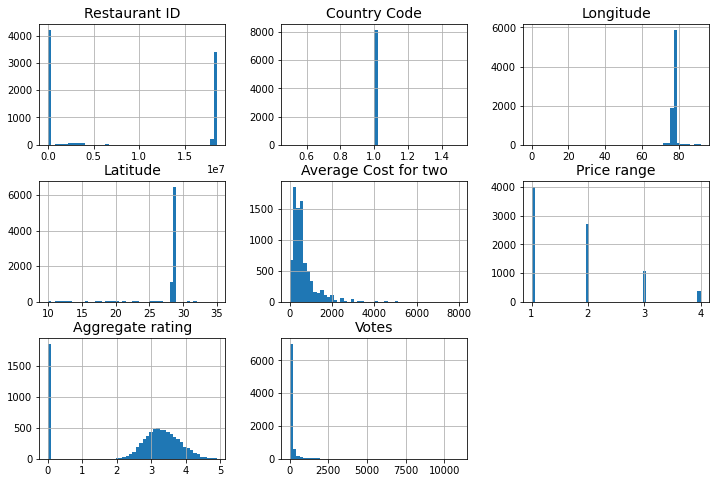

In [27]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [28]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

6526

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [30]:
np.random.seed(42)

In [31]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [32]:
df_with_id = df.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2, "index")

In [33]:
df = df.dropna(axis=0)

In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
test_set["Votes"].isnull().sum()

0

In [36]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [37]:
df["votes_cat"] = pd.cut(df["Votes"],
                               bins=[0,6, 12, 25, 50, 100, 200, 400, 800, 1600, 10935],
                               labels=[1, 2, 3, 4, 5, 6, 7, 8 , 9, 10])

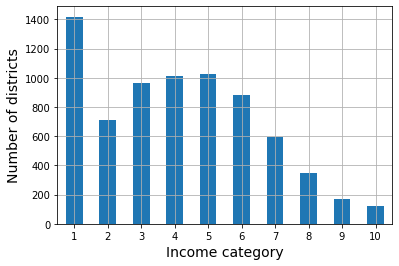

In [38]:
df["votes_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
#save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [191]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df.dropna(subset=["votes_cat"]), df["votes_cat"].dropna()):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])


In [192]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [41]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [42]:
strat_test_set["votes_cat"].value_counts() / len(strat_test_set)

1     0.181630
4     0.131906
5     0.123619
3     0.107735
6     0.100829
7     0.089088
2     0.075967
8     0.045580
10    0.020028
9     0.019337
Name: votes_cat, dtype: float64

In [43]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["votes_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(df),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Votes Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  Strat. Error %  \
Votes Category                                                      
1                   17.38         18.16     17.28            4.48   
2                    8.70          7.60      8.58          -12.72   
3                   11.82         10.77     12.13           -8.84   
4                   12.38         13.19     12.38            6.53   
5                   12.54         12.36     11.21           -1.43   
6                   10.80         10.08     11.27           -6.64   
7                    7.28          8.91      7.17           22.34   
8                    4.30          4.56      4.04            5.93   
9                    2.05          1.93      2.33           -5.55   
10                   1.48          2.00      2.51           35.01   

                Rand. Error %  
Votes Category                 
1                       -0.60  
2                       -1.44  
3                        2.66  
4                       -0.04  
5                      -10.59  
6                        4.39  
7                       -1.55  
8                       -6.02  
9                       13.73  
10                      69.36

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("votes_cat", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Discover and Visualize the Data to Gain Insights

In [45]:
restaurant = strat_train_set.copy()

## Visualizing Geographical Data

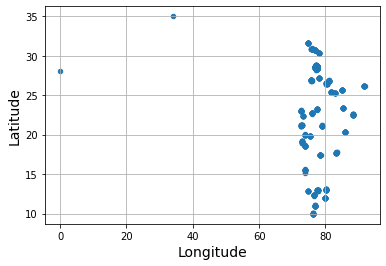

In [46]:
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True)
#save_fig("bad_visualization_plot")  # extra code
plt.show()

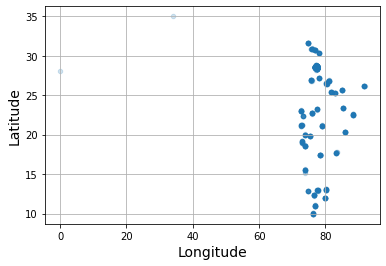

In [47]:
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
#save_fig("better_visualization_plot")  # extra code
plt.show()

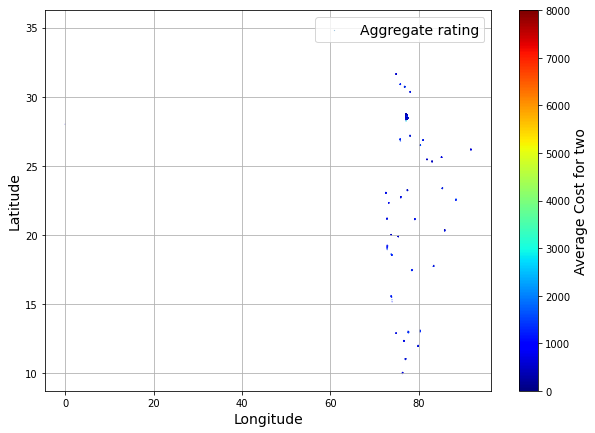

In [48]:
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=df["Aggregate rating"] / 100, label="Aggregate rating",
             c="Average Cost for two", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
#save_fig("housing_prices_scatterplot")  # extra code
plt.show()

It's just a beautified version of the previous figure, with an image of India added in the background, nicer label names and no grid.

In [51]:
import folium
map_india = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
for lat, lon, rating in zip(df["Latitude"], df["Longitude"], df["Aggregate rating"]):
    folium.Circle(location=[lat, lon], radius=rating / 100, color='red', fill=True, fill_color='red').add_to(map_india)
map_india

## Looking for Correlations

In [52]:
corr_matrix = df.corr()

In [53]:
corr_matrix["Average Cost for two"].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.839959
Aggregate rating        0.341079
Votes                   0.279986
Longitude               0.008293
Latitude               -0.103955
Restaurant ID          -0.141473
Country Code                 NaN
Name: Average Cost for two, dtype: float64

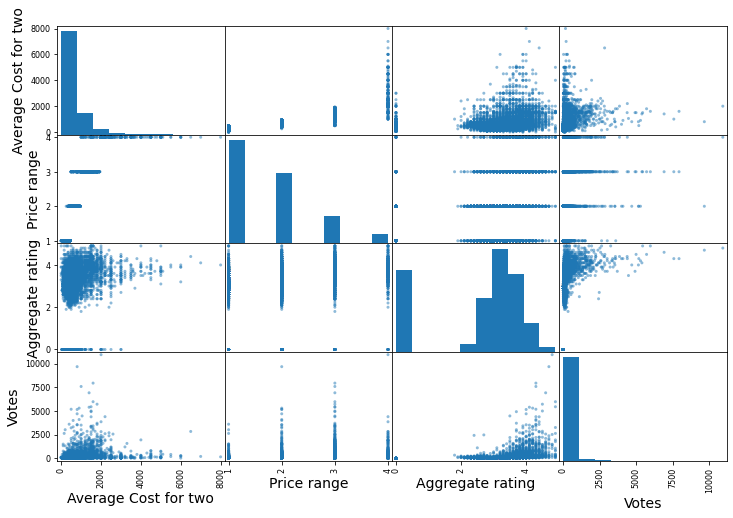

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["Average Cost for two", "Price range", "Aggregate rating",
              "Votes"]
scatter_matrix(df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

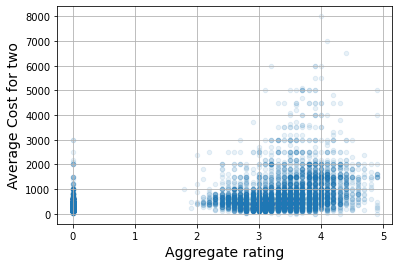

In [55]:
df.plot(kind="scatter", x="Aggregate rating", y="Average Cost for two",
             alpha=0.1, grid=True)
#save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

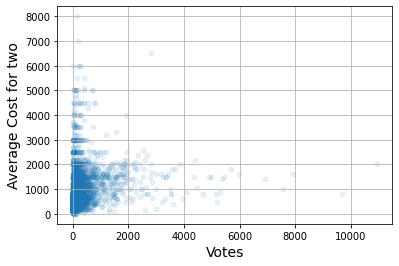

In [56]:
df.plot(kind="scatter", x="Votes", y="Average Cost for two",
             alpha=0.1, grid=True)
#save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

## Experimenting with Attribute Combinations

In [57]:
df["Votes_to_Rating"] = df["Votes"] / df["Aggregate rating"]
#housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
#housing["people_per_house"] = housing["population"] / housing["households"]

In [58]:
corr_matrix = df.corr()
corr_matrix["Average Cost for two"].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.839959
Aggregate rating        0.341079
Votes                   0.279986
Votes_to_Rating         0.258126
Longitude               0.008293
Latitude               -0.103955
Restaurant ID          -0.141473
Country Code                 NaN
Name: Average Cost for two, dtype: float64

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [65]:
restaurants = strat_train_set.drop(["Average Cost for two","Restaurant ID","Restaurant Name","Country Code","City","Address","Locality","Locality Verbose","Currency"],axis=1)
restaurant_labels = strat_train_set["Average Cost for two"].copy()

In [66]:
restaurants

Longitude   Latitude                                   Cuisines  \
2767  77.317478  28.682657                               North Indian   
2059  77.224000  28.562556                                Continental   
6292  77.209630  28.506449                               North Indian   
2692  77.204256  28.695159  Chinese, North Indian, Fast Food, Italian   
1602  77.056311  28.443594                                       Cafe   
...         ...        ...                                        ...   
4562  77.213535  28.538886                              Chinese, Thai   
3162  77.202341  28.556600                           Pizza, Fast Food   
3627  77.245140  28.582412                      North Indian, Chinese   
5122  77.060346  28.667421                     Street Food, Fast Food   
7268  77.069930  28.627488                         Fast Food, Chinese   

     Has Table booking Has Online delivery Is delivering now  \
2767                No                  No                No   
2059               Yes                  No                No   
6292                No                  No                No   
2692                No                 Yes                No   
1602                No                 Yes                No   
...                ...                 ...               ...   
4562                No                 Yes                No   
3162                No                  No                No   
3627                No                 Yes                No   
5122                No                  No                No   
7268                No                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
2767                   No            1               0.0        White   
2059                   No            3               3.9       Yellow   
6292                   No            1               0.0        White   
2692                   No            2               3.9       Yellow   
1602                   No            2               0.0        White   
...                   ...          ...               ...          ...   
4562                   No            2               3.6       Yellow   
3162                   No            2               2.5       Orange   
3627                   No            2               3.3       Orange   
5122                   No            1               0.0        White   
7268                   No            2               2.6       Orange   

     Rating text  Votes  
2767   Not rated      1  
2059        Good    188  
6292   Not rated      2  
2692        Good   2724  
1602   Not rated      3  
...          ...    ...  
4562        Good    268  
3162     Average    238  
3627     Average     29  
5122   Not rated      0  
7268     Average     33  

[5791 rows x 12 columns]

## Data Cleaning

In [68]:
na_cols = df.isna().sum()
print(na_cols)

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude                 0
Latitude                  0
Cuisines                  0
Average Cost for two      0
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Switch to order menu      0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
votes_cat               918
Votes_to_Rating         918
dtype: int64


In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [69]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

Restaurant ID Restaurant Name  Country Code       City  \
250       18433852   The Chaiwalas             1  Faridabad   
256       18472646   Punjabi Rasoi             1  Faridabad   
263       18471268   Baskin Robbin             1  Faridabad   
276         308961          Angaar             1  Faridabad   
277         308963           TcozY             1  Faridabad   

                                               Address  \
250  Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...   
256  1, Deepak Complex, Eros Charmwood Village, Far...   
263  Ground Floor, Crown Interiorz Mall, Sector 35,...   
276  Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...   
277  Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...   

                                       Locality  \
250                                 Badkal Lake   
256                           Charmwood Village   
263  Crown Interiorz Mall, Sector 35, Faridabad   
276              Hotel Saffron Kiran, Faridabad   
277              Hotel Saffron Kiran, Faridabad   

                                      Locality Verbose  Longitude   Latitude  \
250                             Badkal Lake, Faridabad  77.300088  28.426284   
256                       Charmwood Village, Faridabad  77.292431  28.492325   
263  Crown Interiorz Mall, Sector 35, Faridabad, Fa...  77.307448  28.469594   
276          Hotel Saffron Kiran, Faridabad, Faridabad  77.305698  28.471985   
277          Hotel Saffron Kiran, Faridabad, Faridabad  77.306640  28.472209   

                  Cuisines  ...  Has Online delivery Is delivering now  \
250                   Cafe  ...                   No                No   
256           North Indian  ...                   No                No   
263               Desserts  ...                   No                No   
276  North Indian, Chinese  ...                   No                No   
277                   Cafe  ...                   No                No   

    Switch to order menu Price range Aggregate rating Rating color  \
250                   No           1              0.0        White   
256                   No           1              0.0        White   
263                   No           1              0.0        White   
276                   No           3              0.0        White   
277                   No           3              0.0        White   

     Rating text  Votes votes_cat Votes_to_Rating  
250    Not rated      0       NaN             NaN  
256    Not rated      0       NaN             NaN  
263    Not rated      0       NaN             NaN  
276    Not rated      0       NaN             NaN  
277    Not rated      0       NaN             NaN  

[5 rows x 23 columns]

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [71]:
df1 = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']]

In [72]:
df_num = df1.select_dtypes(include=[np.number])

In [73]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [74]:
imputer.statistics_

array([500. ,   2. ,   3.1,  26. ])

Check that this is the same as manually computing the median of each attribute:

In [75]:
df_num.median().values

array([500. ,   2. ,   3.1,  26. ])

Transform the training set:

In [76]:
X = imputer.transform(df_num)

In [77]:
imputer.feature_names_in_

array(['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype=object)

In [78]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df_num.index)

In [79]:
df_tr.loc[null_rows_idx].head()

Average Cost for two  Price range  Aggregate rating  Votes
250                 300.0          1.0               0.0    0.0
256                 400.0          1.0               0.0    0.0
263                 300.0          1.0               0.0    0.0
276                1200.0          3.0               0.0    0.0
277                1500.0          3.0               0.0    0.0

In [80]:
imputer.strategy

'median'

In [81]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df_num.index)

In [82]:
df_tr.loc[null_rows_idx].head()  # not shown in the book

Average Cost for two  Price range  Aggregate rating  Votes
250                 300.0          1.0               0.0    0.0
256                 400.0          1.0               0.0    0.0
263                 300.0          1.0               0.0    0.0
276                1200.0          3.0               0.0    0.0
277                1500.0          3.0               0.0    0.0

In [ ]:
#from sklearn import set_config
#
# set_config(pandas_in_out=True)  # not available yet – see SLEP014

Now let's drop some outliers:

In [83]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [84]:
outlier_pred

array([ 1,  1,  1, ...,  1, -1, -1])

Dropping the Outliers

In [87]:
df1 = df.iloc[outlier_pred == 1]
#restaurant_labels = restaurant_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `Cuisines`:

In [88]:
df_cuisines = df1[["Cuisines"]]
df_cuisines.value_counts()

Cuisines                                             
North Indian                                             716
North Indian, Chinese                                    395
Fast Food                                                290
Chinese                                                  275
North Indian, Mughlai                                    246
                                                        ... 
Italian, Pizza, Lebanese                                   1
Japanese, Asian                                            1
Japanese, Chinese                                          1
Japanese, Chinese, Asian, Malaysian, Thai, Vietnamese      1
Vietnamese                                                 1
Length: 904, dtype: int64

In [89]:
df_cuisines

Cuisines
0                                 North Indian, Mughlai
2                                          North Indian
3                                            Rajasthani
4                        North Indian, Chinese, Mughlai
11                               South Indian, Desserts
...                                                 ...
8643                 Mughlai, Chinese, Cafe, BBQ, Cajun
8645  South Indian, Chinese, Continental, Italian, N...
8646                                    Biryani, Andhra
8647  Continental, Seafood, Chinese, North Indian, B...
8649                             Burger, Pizza, Biryani

[6320 rows x 1 columns]

In [90]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_encoded = ordinal_encoder.fit_transform(df_cuisines)

In [91]:
df_encoded[:8]

array([[717.],
       [596.],
       [810.],
       [638.],
       [839.],
       [622.],
       [717.],
       [483.]])

In [92]:
ordinal_encoder.categories_

[array(['Afghani', 'American',
        'American, Asian, North Indian, Mexican, South Indian',
        'American, Continental, North Indian, Chinese',
        'American, Fast Food', 'American, Fast Food, Burger',
        'American, Fast Food, Desserts',
        'American, Fast Food, Salad, Healthy Food', 'American, Italian',
        'American, Italian, Bakery, Deli, Burger, Sandwich, Pizza',
        'American, Italian, Cafe',
        'American, Italian, Mughlai, North Indian', 'Andhra',
        'Andhra, North Indian, Chinese',
        'Andhra, North Indian, Chinese, Seafood, Biryani',
        'Arabian, Lebanese', 'Arabian, Mexican', 'Arabian, North Indian',
        'Asian', 'Asian, Chinese', 'Asian, Chinese, Japanese',
        'Asian, Chinese, North Indian', 'Asian, Chinese, Thai, Vietnamese',
        'Asian, Chinese, Tibetan', 'Asian, Continental',
        'Asian, North Indian', 'Asian, North Indian, Continental',
        'Asian, Seafood', 'Asian, Thai', 'Assamese', 'Assamese, Chinese

In [93]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_1hot = cat_encoder.fit_transform(df_cuisines)

In [94]:
df_1hot

<6320x904 sparse matrix of type '<class 'numpy.float64'>'
	with 6320 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [95]:
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [96]:
cat_encoder = OneHotEncoder(sparse=False)
df_1hot = cat_encoder.fit_transform(df_cuisines)
df_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
cat_encoder.categories_

[array(['Afghani', 'American',
        'American, Asian, North Indian, Mexican, South Indian',
        'American, Continental, North Indian, Chinese',
        'American, Fast Food', 'American, Fast Food, Burger',
        'American, Fast Food, Desserts',
        'American, Fast Food, Salad, Healthy Food', 'American, Italian',
        'American, Italian, Bakery, Deli, Burger, Sandwich, Pizza',
        'American, Italian, Cafe',
        'American, Italian, Mughlai, North Indian', 'Andhra',
        'Andhra, North Indian, Chinese',
        'Andhra, North Indian, Chinese, Seafood, Biryani',
        'Arabian, Lebanese', 'Arabian, Mexican', 'Arabian, North Indian',
        'Asian', 'Asian, Chinese', 'Asian, Chinese, Japanese',
        'Asian, Chinese, North Indian', 'Asian, Chinese, Thai, Vietnamese',
        'Asian, Chinese, Tibetan', 'Asian, Continental',
        'Asian, North Indian', 'Asian, North Indian, Continental',
        'Asian, Seafood', 'Asian, Thai', 'Assamese', 'Assamese, Chinese

In [99]:
df_test = pd.DataFrame({"Cuisines": ["North Indian", "North Indian, Chinese"]})
pd.get_dummies(df_test)

Cuisines_North Indian  Cuisines_North Indian, Chinese
0                      1                               0
1                      0                               1

In [100]:
cat_encoder.transform(df_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["North Indian", "North Indian, Chinese"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_North Indian  ocean_proximity_North Indian, Chinese
0                             1                                      0
1                             0                                      1

In [102]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- Cuisines

  warnings.warn(message, FutureWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
cat_encoder.feature_names_in_

array(['Cuisines'], dtype=object)

In [104]:
cat_encoder.get_feature_names_out()

array(['Cuisines_Afghani', 'Cuisines_American',
       'Cuisines_American, Asian, North Indian, Mexican, South Indian',
       'Cuisines_American, Continental, North Indian, Chinese',
       'Cuisines_American, Fast Food',
       'Cuisines_American, Fast Food, Burger',
       'Cuisines_American, Fast Food, Desserts',
       'Cuisines_American, Fast Food, Salad, Healthy Food',
       'Cuisines_American, Italian',
       'Cuisines_American, Italian, Bakery, Deli, Burger, Sandwich, Pizza',
       'Cuisines_American, Italian, Cafe',
       'Cuisines_American, Italian, Mughlai, North Indian',
       'Cuisines_Andhra', 'Cuisines_Andhra, North Indian, Chinese',
       'Cuisines_Andhra, North Indian, Chinese, Seafood, Biryani',
       'Cuisines_Arabian, Lebanese', 'Cuisines_Arabian, Mexican',
       'Cuisines_Arabian, North Indian', 'Cuisines_Asian',
       'Cuisines_Asian, Chinese', 'Cuisines_Asian, Chinese, Japanese',
       'Cuisines_Asian, Chinese, North Indian',
       'Cuisines_Asian, Ch

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [106]:
df_output

Cuisines_Afghani  Cuisines_American  \
0               0.0                0.0   
1               0.0                0.0   

   Cuisines_American, Asian, North Indian, Mexican, South Indian  \
0                                                0.0               
1                                                0.0               

   Cuisines_American, Continental, North Indian, Chinese  \
0                                                0.0       
1                                                0.0       

   Cuisines_American, Fast Food  Cuisines_American, Fast Food, Burger  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   

   Cuisines_American, Fast Food, Desserts  \
0                                     0.0   
1                                     0.0   

   Cuisines_American, Fast Food, Salad, Healthy Food  \
0                                                0.0   
1                                                0.0   

   Cuisines_American, Italian  \
0                         0.0   
1                         0.0   

   Cuisines_American, Italian, Bakery, Deli, Burger, Sandwich, Pizza  ...  \
0                                                0.0                  ...   
1                                                0.0                  ...   

   Cuisines_Thai, Chinese, Seafood  Cuisines_Thai, Japanese  Cuisines_Tibetan  \
0                              0.0                      0.0               0.0   
1                              0.0                      0.0               0.0   

   Cuisines_Tibetan, Chinese  Cuisines_Tibetan, Chinese, North Indian  \
0                        0.0                                      0.0   
1                        0.0                                      0.0   

   Cuisines_Tibetan, Fast Food  Cuisines_Tibetan, Nepalese  \
0                          0.0                         0.0   
1                          0.0                         0.0   

   Cuisines_Tibetan, South Indian, North Indian  Cuisines_Turkish  \
0                                           0.0               0.0   
1                                           0.0               0.0   

   Cuisines_Vietnamese  
0                  0.0  
1                  0.0  

[2 rows x 904 columns]

## Feature Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)

In [108]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

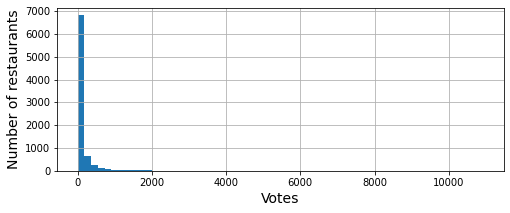

In [112]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(8, 3), sharey=True)
df["Votes"].hist(ax=axs, bins=60)
axs.set_xlabel("Votes")
axs.set_ylabel("Number of restaurants")
plt.show()

In [115]:
from sklearn.metrics.pairwise import rbf_kernel

df_simil_35 = rbf_kernel(df[["Votes"]], [[35]], gamma=0.1)

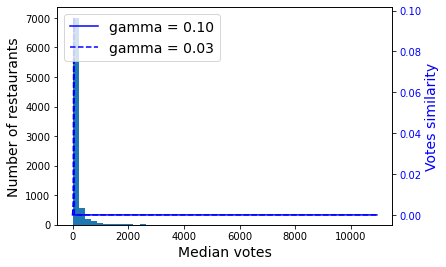

In [116]:
# extra code – this cell generates Figure 2–18

votes = np.linspace(df["Votes"].min(),
                   df["Votes"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(votes, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(votes, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Median votes")
ax1.set_ylabel("Number of restaurants")
ax1.hist(df["Votes"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(votes, rbf1, color=color, label="gamma = 0.10")
ax2.plot(votes, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Votes similarity", color=color)

plt.legend(loc="upper left")
#save_fig("age_similarity_plot")
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(restaurant_labels.to_frame())

model = LinearRegression()
model.fit(restaurants[["Votes"]], scaled_labels)
some_new_data = restaurants[["Votes"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [119]:
predictions

array([[ 582.21154684],
       [ 652.35858499],
       [ 582.58666469],
       [1603.65745534],
       [ 582.96178254]])

In [120]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(restaurants[["Votes"]], restaurant_labels)
predictions = model.predict(some_new_data)

In [121]:
predictions

array([ 582.21154684,  652.35858499,  582.58666469, 1603.65745534,
        582.96178254])

## Custom Transformers

To create simple transformers:

In [122]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(df[["Votes"]])

In [123]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
df_simil_35 = rbf_transformer.transform(df[["Votes"]])

In [124]:
df_simil_35

array([[0.00000000e+000],
       [6.63881932e-152],
       [3.68784019e-118],
       ...,
       [0.00000000e+000],
       [8.78636625e-067],
       [0.00000000e+000]])

In [125]:
sf_coords = 77.7749, 28.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(df[["Latitude", "Longitude"]])

In [126]:
sf_simil

array([[7.88387228e-219],
       [7.81309408e-219],
       [1.27433394e-218],
       ...,
       [2.77564261e-288],
       [2.23407435e-288],
       [2.83938889e-288]])

In [127]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [129]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [130]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(restaurants[["Latitude", "Longitude"]],
                                           sample_weight=restaurant_labels)

In [131]:
similarities[:3].round(2)

array([[0.97, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [133]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [134]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [135]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [136]:
df_num_prepared = num_pipeline.fit_transform(df_num)
df_num_prepared[:2].round(2)

array([[ 0.36,  1.48,  0.89, -0.01],
       [-0.22,  0.32,  0.69, -0.11]])

In [137]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [138]:
df_df_num_prepared = pd.DataFrame(
    df_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=df_num.index)

In [139]:
df_df_num_prepared.head(2)  # extra code

Average Cost for two  Price range  Aggregate rating     Votes
0              0.359113     1.484331          0.892887 -0.008981
2             -0.217755     0.315297          0.689045 -0.113600

In [140]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [141]:
num_pipeline[1]

StandardScaler()

In [142]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [143]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [144]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [145]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'votes_cat', 'Votes_to_Rating'],
      dtype='object')

In [146]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Longitude", "Latitude", "Aggregate rating", "Votes",
               ]
cat_attribs = ["City","Rating text","Rating color"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [147]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [148]:
restaurant_prepared = preprocessing.fit_transform(restaurants)

In [152]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("votes_per_rating", ratio_pipeline(), ["Votes", "Aggregate rating"]),
        ("geo", cluster_simil, ["Latitude", "Longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [153]:
restaurants=restaurants.replace({'Aggregate rating': {0: 1}})


In [154]:
restaurant_prepared = preprocessing.fit_transform(restaurants)
restaurant_prepared.shape

(5791, 1074)

In [155]:
preprocessing.get_feature_names_out()

array(['votes_per_rating__ratio', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', ..., 'cat__Rating text_Poor',
       'cat__Rating text_Very Good', 'remainder__Price range'],
      dtype=object)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [156]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(restaurants, restaurant_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('votes_per_rating',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_nam...
                                                   'Aggregate rating']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567eabbe0>)])),
                ('linearregression', LinearRegression())])

The full preprocessing pipeline on a few training instances:

In [157]:
restaurant_predictions = lin_reg.predict(restaurants)
restaurant_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([ 200., 2000.,  200.,  800.,  700.])

Compare against the actual values:

In [158]:
restaurant_labels.iloc[:5].values

array([ 200, 1500,  400,  800,  800])

In [159]:
# extra code – computes the error ratios discussed in the book
error_ratios = restaurant_predictions[:5].round(-2) / restaurant_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.0%, 33.3%, -50.0%, 0.0%, -12.5%


In [160]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(restaurant_labels, restaurant_predictions,
                              squared=False)
lin_rmse

218.29105037914442

In [161]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(restaurants, restaurant_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('votes_per_rating',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_nam...
                                                  ClusterSimilarity(random_state=42),
                                                  ['Latitude', 'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567eabbe0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [162]:
restaurant_predictions = tree_reg.predict(restaurants)
tree_rmse = mean_squared_error(restaurant_labels, restaurant_predictions,
                              squared=False)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [163]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, restaurants,restaurant_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [164]:
tree_rmses

array([270.00446995, 190.17308724, 229.50762044, 207.37024368,
       274.04253165, 253.26026125, 256.31067882, 227.8437637 ,
       294.00310174, 217.897791  ])

In [165]:
pd.Series(tree_rmses).describe()

count     10.000000
mean     242.041355
std       32.777859
min      190.173087
25%      220.384284
50%      241.383941
75%      266.581022
max      294.003102
dtype: float64

In [166]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, restaurants, restaurant_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count     10.000000
mean     314.628999
std       49.421707
min      246.129926
25%      267.468292
50%      324.932386
75%      353.466658
max      375.746447
dtype: float64

In [167]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, restaurants, restaurant_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [168]:
pd.Series(forest_rmses).describe()

count     10.000000
mean     214.264573
std       32.723154
min      167.235150
25%      190.080840
50%      216.524729
75%      236.420842
max      262.813124
dtype: float64

Comparing this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [169]:
forest_reg.fit(restaurants, restaurant_labels)
housing_predictions = forest_reg.predict(restaurants)
forest_rmse = mean_squared_error(restaurant_labels, restaurant_predictions,
                                 squared=False)
forest_rmse

0.0

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

In [170]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(restaurants, restaurant_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('votes_per_rating',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_name...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567eabbe0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [171]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__vo

The best hyperparameter combination found:

In [172]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 5, 'random_forest__max_features': 8}

In [173]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('votes_per_rating',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0...
                                                  ClusterSimilarity(n_clusters=5,
                                                                    random_state=42),
                                                  ['Latitude', 'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567e146a0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [174]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

n_clusters max_features  split0  split1  split2  mean_test_rmse
2           5            8     245     283     253             260
12         15            6     240     282     261             261
13         15            8     245     281     260             262
11         10           10     243     287     259             263
1           5            6     252     278     261             263

## Randomized Search

In [175]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(restaurants, restaurant_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('votes_per_rating',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(featur...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567eabbe0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb567e1c8b0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb567e31eb0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [177]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


n_clusters max_features  split0  split1  split2  mean_test_rmse
4         13            5     250     290     265             268
9          4            2     253     293     263             270
3         21           12     275     292     265             277
2         23            8     276     315     289             293
7         26           13     282     312     291             295

## Analyze the Best Models and Their Errors

In [180]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.  , ..., 0.  , 0.01, 0.25])

In [181]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.24746366860318114, 'remainder__Price range'),
 (0.0977457105450384, 'cat__Has Table booking_Yes'),
 (0.08638348959262691, 'cat__Has Table booking_No'),
 (0.0699046486933718, 'votes_per_rating__ratio'),
 (0.05630252142854629, 'geo__Cluster 0 similarity'),
 (0.05089185205923252, 'geo__Cluster 9 similarity'),
 (0.017398869441880214, 'cat__Cuisines_Finger Food'),
 (0.01554376581221069, 'cat__Rating color_Green'),
 (0.012045166764291088, 'cat__Rating text_Good'),
 (0.011622080365041273, 'cat__Rating text_Not rated'),
 (0.01035202019395605, 'cat__Rating color_Yellow'),
 (0.00932031377281962, 'cat__Has Online delivery_Yes'),
 (0.00927934441501207, 'cat__Rating text_Very Good'),
 (0.007677703564748093, 'cat__Rating color_White'),
 (0.00761777716759729, 'cat__Has Online delivery_No'),
 (0.006669249615089868, 'cat__Rating color_Orange'),
 (0.0064744066284941615, 'cat__Cuisines_Chinese'),
 (0.005889260034765868,
  'cat__Cuisines_Asian, Japanese, Korean, Thai, Chinese'),
 (0.005548568593438017

## Evaluate Your System on the Test Set

In [197]:
strat_test_set1 =strat_test_set.dropna()

In [200]:
strat_test_set1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [201]:
strat_test_set1 =strat_test_set.dropna()

In [202]:
X_test = strat_test_set1.drop("Average Cost for two", axis=1)
y_test = strat_test_set1["Average Cost for two"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

327.57667117165937


We can compute a 95% confidence interval for the test RMSE:

In [203]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([230.90318858, 401.61756497])

We could compute the interval manually like this:

In [204]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(230.9031885824836, 401.61756497226673)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [186]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

NameError: ignored

## Model persistence using joblib

Save the final model:

In [187]:
import joblib

joblib.dump(final_model, "restaurantmodel.pkl")

['restaurantmodel.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("restaurant_model.pkl")

new_data = restaurants.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])

You could use pickle instead, but joblib is more efficient.

# Exercise solutions

## 1.

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(restaurants.iloc[:5000], restaurant_labels.iloc[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('votes_per_rating',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_name...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb567eabbe0>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

274.1209774579817

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [205]:
grid_search.best_params_

{'svr__C': 1000.0, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': reciprocal(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(restaurants.iloc[:5000], restaurant_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('votes_per_rating',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(featur...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fe8f89d3af0>)])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8ff0365e0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f4f83b50>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

275.3472261047453

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

{'svr__C': 113564.03940586245,
 'svr__gamma': 0.0007790692366582295,
 'svr__kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

0.80066

We used the `reciprocal()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

## 3.

Adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Creating a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  restaurants.iloc[:5000],
                                  restaurant_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

count      3.000000
mean     329.904200
std       11.875797
min      318.766801
25%      323.655629
50%      328.544458
75%      335.472900
max      342.401342
dtype: float64

Tuning feature selection using random search or grid search

Creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone

class FeatureFromRegressor(MetaEstimatorMixin, BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        estimator_ = clone(self.estimator)
        estimator_.fit(X, y)
        self.estimator_ = estimator_
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator, "feature_names_in_"):
            self.feature_names_in_ = self.estimator.feature_names_in_
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = restaurants[["Latitude", "Longitude"]]
knn_transformer.fit_transform(geo_features, restaurant_labels)

array([[ 250.],
       [ 300.],
       [1200.],
       ...,
       [ 100.],
       [  25.],
       [ 100.]])

output feature name 

In [ ]:
knn_transformer.get_feature_names_out()

['kneighborsregressor_prediction_0']

Including this transformer in our preprocessing pipeline:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["Latitude", "Longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  restaurants.iloc[:5000],
                                  restaurant_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

count      3.000000
mean     502.129367
std        5.914051
min      497.232444
25%      498.844122
50%      500.455800
75%      504.577828
max      508.699855
dtype: float64

Automatically explore some preparation options using `RandomSearchCV`._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": reciprocal(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(restaurants.iloc[:5000], restaurant_labels.iloc[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('votes_per_rating',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x7fe8f4f245e0>,
                                                                                                                    func=<function column_ratio at 0x7fe8f4f24040>)),
                                                                                               ('standardscaler',
                                                                                                St...
                   param_distributions={'preprocessing__geo__estimator__n_neighbors': range(1, 30),
                                        'preprocessing__geo__estimator__weights': ['distance',
                                                                                   'uniform'],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f53b19d0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8f53b1c40>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

489.27275778085254

## 6.

Implementing the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X_orig = X
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        if hasattr(X_orig, "columns"):
            self.feature_names_in_ = np.array(X_orig.columns, dtype=object)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            raise ValueError("Unexpected number of features")
        X = X * self.scale_
        return X + self.mean_ if self.with_mean else X
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Testing the custom transformer:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
 
check_estimator(StandardScalerClone())

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out 


In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])